In [1]:
#A_ch03_004_kmeans02.ipynb

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import mglearn

In [4]:
#import make_blobs
from sklearn.datasets import make_blobs

In [5]:
#import KMeans module
from sklearn.cluster import KMeans 

In [6]:
#以 make_blobs 建立虛擬資料
X,y=make_blobs(random_state=1)

In [7]:
#檢視資料集 X (本例，不管y) 
print('X.shape :',X.shape)

X.shape : (100, 2)


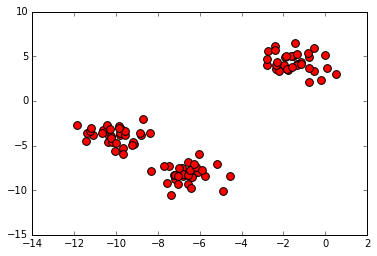

In [8]:
#繪製檢視 X
plt.scatter(X[:,0],X[:,1],c='r',s=60)

In [9]:
#建置 K-means 分群模型

In [10]:
kmeans_3=KMeans(n_clusters=3) #設定 k=3

In [11]:
#以 X fit model
kmeans_3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
#訓練後，X內每個點將會指定一個群標籤，可以在 Kmeans_3.labels_ 屬性內找到

In [13]:
print('Cluster memberships:\n',kmeans_3.labels_)
#我們設定的是k=3,所以群標籤為0,1,2

Cluster memberships:
 [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [14]:
#你也可以使用訓練好的 kmeans model 對新資料點作預測(雖然這不是我們的主要目的)
#當預測時，新資料點被指給最接近的群中心，但現有模型不再改變
#kmean.predict()
#我們以 X_test 兩資料點作預測
import numpy as np
X_test=np.array([[-10.0,-7.0],[-6.0,-14.0],[-1.0,1.0]])
pred=kmeans_3.predict(X_test)
pred

array([0, 2, 1])

In [15]:
#分群類似分類，每個 X 中的資料點都得到一個標籤。
#然而，它不是真實標籤，因為標籤本身沒有固有的意義。
#演算法給你的唯一資訊是，所有標示為2的點都是相似的 (0,1亦同)
#因為初始化隨機的性質，再次運行演算法可能會產生不同的群標籤。

In [16]:
#群中心被儲存在 model.culster_centers_ 屬性 (群標籤在 model.label_ 屬性)

In [17]:
#我們以 mglearn.discrete_scatter() 繪圖來展示 k-means 訓練結果

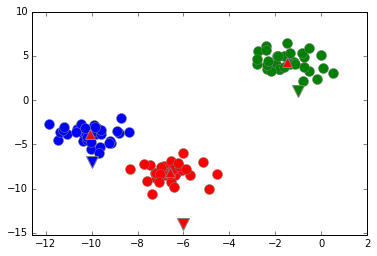

In [18]:
#繪製已分群模型 .labels
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans_3.labels_,markers='o',                       )
#繪製分群中心點 .cluster_centers_
mglearn.discrete_scatter(kmeans_3.cluster_centers_[:,0],
                        kmeans_3.cluster_centers_[:,1],[0,1,2],
                        markers='^',c='r',markeredgewidth=1)
#繪製新資料點(X_test)預測結果
mglearn.discrete_scatter(X_test[:,0],X_test[:,1],pred,markers='v',
                         markeredgewidth=1,s=12)

In [19]:
#同樣的資料，我們設定 k=2 及 k=5 試試看:

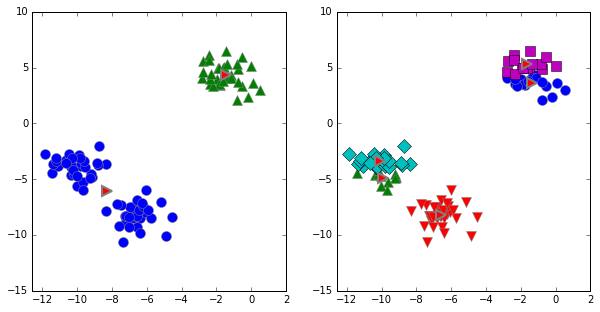

In [20]:
#先設定一個 (1,2) 的 subplots
fig,axes=plt.subplots(1,2,figsize=(10,5))

#設定 k=2
kmeans_2=KMeans(n_clusters=2)
kmeans_2.fit(X)
assignments=kmeans_2.labels_
#繪圖
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])
#也把群中心畫出
mglearn.discrete_scatter(kmeans_2.cluster_centers_[:,0],
                        kmeans_2.cluster_centers_[:,1],[0,1],
                        markers='>',markeredgewidth=2,c='r',ax=axes[0])

#設定 k=5
kmeans_5=KMeans(n_clusters=5)
kmeans_5.fit(X)
assignments=kmeans_5.labels_
#繪圖
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1])
#也把群中心畫出
mglearn.discrete_scatter(kmeans_5.cluster_centers_[:,0],
                        kmeans_5.cluster_centers_[:,1],[0,1,2,3,4],
                        markers='>',markeredgewidth=2,c='r',ax=axes[1])